In [12]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
import lightgbm as lgb 
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
train = pd.read_csv("C:\\Users\\user\\mercedes-benz-greener-manufacturing\\train.csv")
test =  pd.read_csv("C:\\Users\\user\\mercedes-benz-greener-manufacturing\\test.csv")

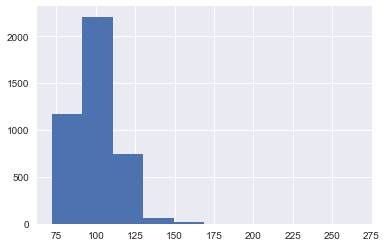

In [14]:
train["y"].hist()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


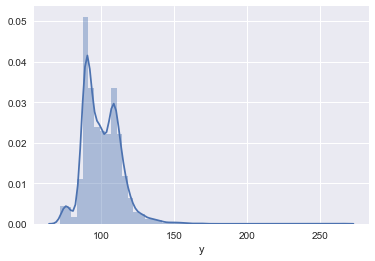

In [36]:
sns.distplot(train.y)

In [42]:
train[train.y>170]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


ValueError: First argument must be a sequence

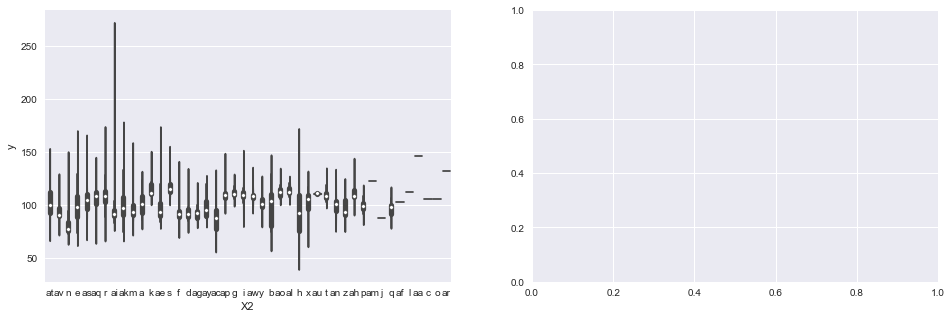

In [44]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(16, 5)
sns.violinplot(x="X2",y="y", data=train,ax=ax[0])
plt.scatter(x="X2",y="y", data=train)

In [4]:
# store it as Y
Y_train = train["y"]
train.drop(["y"], axis=1, inplace=True)
id_test = test["ID"]

num_train = len(train)
all_data = pd.concat([train, test])
all_data.drop(["ID"], axis=1, inplace=True)
all_data = pd.get_dummies(all_data)
X_train = all_data[:num_train]
X_test = all_data[num_train:]

X_train, X_cv, y_train, y_cv = train_test_split( X_train, Y_train, test_size = 0.3, random_state = 100)

In [5]:
train_data=lgb.Dataset(X_train,label=y_train)

AttributeError: module 'lightgbm' has no attribute 'Dataset'